In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dir = r"C:\Users\HP\Downloads\Pro 2\ApplesOrTomatoes\train"
test_dir = r"C:\Users\HP\Downloads\Pro 2\ApplesOrTomatoes\test"

In [4]:
image_height, image_width = 512, 512

In [5]:
batch_size = 32

In [6]:
train_dataset = ImageDataGenerator(rescale=1./255)

In [7]:
test_dataset = ImageDataGenerator(rescale=1./255)

In [8]:
X_tr = train_dataset.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 294 images belonging to 2 classes.


In [9]:
X_te = test_dataset.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 97 images belonging to 2 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Adjusted to 2 units for binary classification
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(
    X_tr,
    epochs=10,
    validation_data=X_te
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 136s 12s/step - accuracy: 0.4505 - loss: 5.7265 - val_accuracy: 0.5876 - val_loss: 0.8465
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 162s 11s/step - accuracy: 0.6186 - loss: 0.6621 - val_accuracy: 0.5876 - val_loss: 0.5354
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 151s 15s/step - accuracy: 0.6590 - loss: 0.6193 - val_accuracy: 0.6804 - val_loss: 0.5542
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 13s/step - accuracy: 0.7267 - loss: 0.4945 - val_accuracy: 0.7320 - val_loss: 0.5211
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 148s 15s/step - accuracy: 0.7897 - loss: 0.4372 - val_accuracy: 0.7423 - val_loss: 0.4293
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 133s 12s/step - accuracy: 0.8084 - loss: 0.3997 - val_accuracy: 0.7526 - val_loss: 0.4254
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 96s 9s/step - accuracy: 0.8890 - loss: 0.3374 - val_accuracy: 0.6804 - val_loss: 0.7694
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 96s 9s/step - accuracy: 0.8807 - loss: 0.2714 - val_accuracy: 0.7010

In [14]:
import matplotlib.pyplot as plt

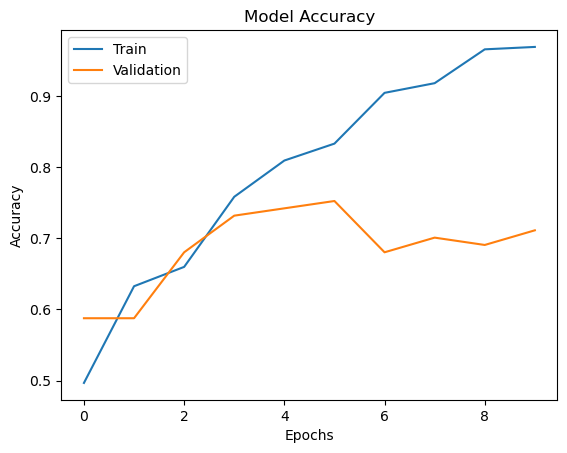

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

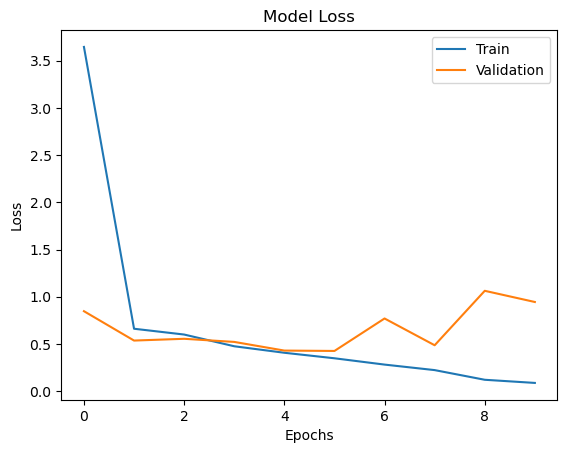

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [19]:
classLabels = X_tr.class_indices

In [21]:
classNames = {value: key for key, value in classLabels.items()}
print("Class Names:", classNames)

Class Names: {0: 'apples', 1: 'tomatoes'}


In [22]:
from tensorflow.keras.preprocessing import image

In [43]:
NewImgPath = r"C:\Users\HP\Downloads\Pro 2\img_p1_4.jpeg"

In [44]:
NewImg = image.load_img(NewImgPath, target_size=(image_height, image_width))

In [45]:
ImgArr = image.img_to_array(NewImg)

In [46]:
ImgArr = np.expand_dims(ImgArr, axis=0)

In [47]:
ImgArr = ImgArr / 255.0

In [48]:
Predict = model.predict(ImgArr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


In [49]:
PredictClass = np.argmax(Predict)

In [50]:
classNames[PredictClass]

'apples'